<a href="https://colab.research.google.com/github/GerardoxCarreon/FisicaComputacional1/blob/master/Actividad10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Actividad 10***
"Solución Numerica de Ecuaciones Diferenciales Parciales" 

---

En esta la actividad 10 de Fisica Computacional, resolveremos ecuaciones diferenciales parciales que surgen cuando se involucran dos o más variables (tiempo -espacio). Estas ecuaciones se pueden clasificar en 3 grandes tipos sin embargo, existen muchas combinaciones entre estas ademas de la introduccion de los valores de frontera. Por lo tanto, hay una cantidad basta de métodos numericos que dan solucion a estas ecuaciones diferenciales parciales pero en esta actividad solo nos enfocaremos en uno el cual es Método de Diferencias Finitas.
Resolveremos por el método de diferencias finitas la Ecuación del Calor en una dimensión para la temperatura u(t,x), dada una condición inicial y 2 condiciones a la frontera. Por ejemplo una barra de cobre de longitud L=1 (térmicamente aislada en las paredes), y los extremos pueden estar térmicamente aislados, o estar a cierta temperatura fija, o estar libres para que el calor escape. 

In [3]:
#Aqui introducimos las bibliotecas a utilizar
import numpy as np
from scipy.integrate import odeint, solve_ivp, solve_bvp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

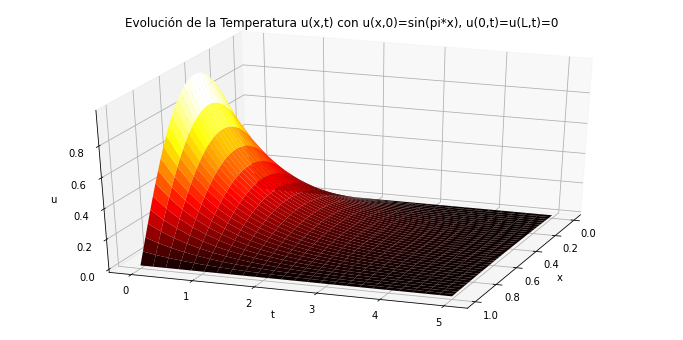

In [ ]:
#EJEMPLO

# Solución de la Ecuación del Calor usando scipy.integrate.odeint
# Problema de Valor Inicial y Condiciones a la Frontera Tipo de Dirichlet

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos la expresión de diferencias finitas centradas de segundo orden
def odefunc(u, t):
    # Llenamos de ceros inicialmente
    dudt = np.zeros(x0.shape)

    # Condiciones a la Frontera Tipo Dirichlet: Temperatura constante
    # Condiciones a la frontera u(0,t)=u(L,t)=0 
    dudt[0] = 0
    dudt[-1] = 0 # Equivale a evaluar en el último punto N

    # Constante de difusión del calor
    kappa=0.1
    
    # Calculamos la temperatura en los puntos interiores 1 a N-1.
    for i in range(1, N-1):
        dudt[i] = kappa*(u[i + 1] - 2*u[i] + u[i - 1]) / h**2
    return dudt

# Algunos parámetros
# Intervalo en x = (a,b)
a = 0
b = 1
# Tiempo inicial y final
t0 = 0
tf = 5.0

# Número de puntos en la dirección x
N = 40
# Tamaño de delta x
h = (b-a)/(N-1)

# Contantes de diferencias finitas
#k = 0.25*h**2
#r = k/h**2;

# Los puntos en el dominio x
x = np.linspace(a, b, N);

# La condición inicial u(x,0)=sin(pi*x)
x0 = np.sin(np.pi*x)
x0[x0 < 0] = 0

# Puntos de integración en el tiempo
tspan = np.linspace(t0, tf, 25);

# Solución usando scipy.integrate.odeint
sol = odeint(odefunc, x0, tspan)

#%% Make a 3d figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='hot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=30, azim=20)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=u(L,t)=0')
plt.show()

*   # ***Ejercicio 1.*** 
Resuelva la Ecuación del calor, usando el método anterior para el siguiente caso:



*   # ***Caso a).*** 
Una barra metálica de longitud $L=10$, y coeficiente de difusión $\kappa=100$. Condición inicial (Temperatura dentro de la barra): u(x,0) = 0.

Condiciones a la frontera: u(0,t)=10, u(L,t)=0.

Realice los cálculos hasta alcanzar el equilibrio térmico.


dt/dx**2 < 0.5? 0.004624924984996999


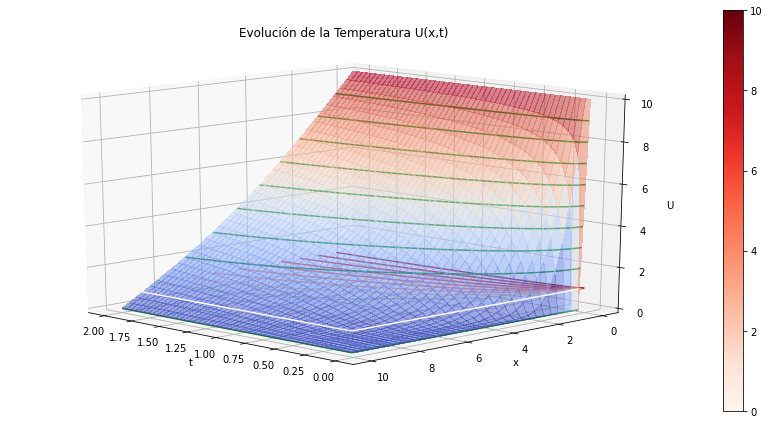

In [36]:
#Resolveremos este ejercicio 1 utilizando el método de diferencias finitas de segundo orden
#Lo primero sera definir los parámetros y condiciones iniciales del problema 

#Número de pasos
M=35   #Número de puntos en el eje x
N=5000   #Número de puntos en el tiempo
#Longitud de la barra (coordenadas)
x0=0.0  
xL=10.0 
#Intervalo de tiempo
ti=0.0
tf=2.0

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tf - ti) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 10.0 # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(ti, tf, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
U[:,0] = np.zeros(xspan.shape)
# Condiciones a la Frontera tipo Dirichlet
U[0, :] = 10
U[-1, :] = 0

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='coolwarm', linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, colors="green", linestyles="solid")
ax.contour(T, X, U, 10, cmap="Reds", linestyles="solid", offset=1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t)')

# Punto del observador 
ax.view_init(elev=15, azim=135)

plt.tight_layout()
plt.show()

*   # ***Caso b).*** 
Un material de longitud $L=10$ con coeficiente de difusión térmica $\kappa=0.25$

Condición inicial u(x,0)=20.

Condiciones a la frontera: u(0,t)=(20 + 10 sin(pi*t/12), u(L,t)=20.

Realice los cálculos para t=(0,48)

Pueden ajustar los parámetros para ver cómo cambia la temperatura dentro del cuerpo.

dt/dx**2 < 0.5? 0.0128


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


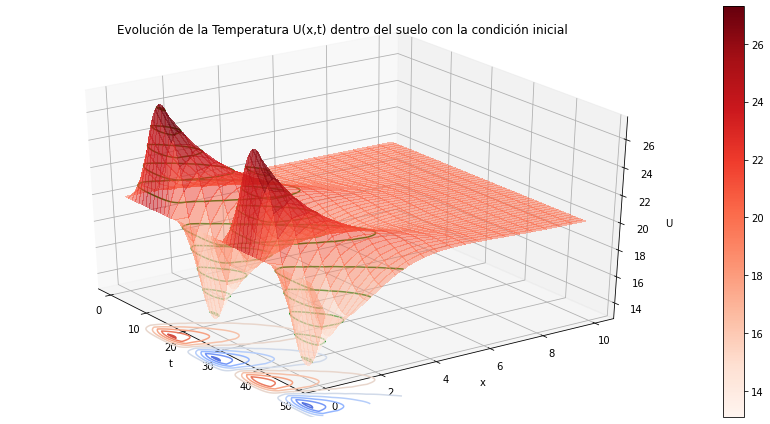

In [37]:
#Lo primero sera definir los parámetros y condiciones iniciales del problema 

#Número de pasos
M=21   #Número de puntos en el eje x
N=15001   #Número de puntos en el tiempo
#Longitud de la barra (coordenadas)
x0=0.0  
xL=10.0 
#Intervalo de tiempo
ti=0.0
tf=48.0

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tf - ti) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 0.25 # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(ti, tf, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# La temperatura inicial es de 20ºC dentro de la tierra
U[:,0] = 20.0*np.ones(xspan.shape)

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    # Condiciones a la frontera (varía con el tiempo) 
    t=k*dt
    U[0, :] = 20 + 10*np.sin(np.pi*t/12.0)
    U[-1, :] = 20.0
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds', linewidth=0.01, antialiased=False, alpha=0.5)
# Contornos
ax.contour(T, X, U, 10, colors="green", linestyles="solid")
ax.contour(T, X, U, 10, cmap="coolwarm", linestyles="solid", offset=10)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) dentro del suelo con la condición inicial ')

# Punto del observador 
ax.view_init(elev=30, azim=-35)

plt.tight_layout()
plt.show()

*   # ***Ejercicio 2. Variaciones de la Temperatura en el suelo*** 
La superficie de la Tierra recibe radiación solar durante el día. Esta Energía la transforma en calor, y cambia la temperatura dentro del suelo. Por la noche al no recibir radiación solar la emite a la atmósfera.

Si suponemos que la temperatura del suelo varía con la profundidad, podemos suponer que tenemos un problema unidimensional, siendo el eje $x$ la dirección hacia dentro del suelo.

A cierta profundidad $x=L$, suponemos que la temperatura ya no cambia, es decir $\partial u/\partial x = 0$ (Condición de Neumann).

Supondremos que la variación de la temperatura en la superficie terrestre varía como

$$\begin{equation*}
u(0,t) = u_0 + u_a \sin (\frac{2\pi t}{P})
\end{equation*}$$
donde $u_0$ es la inical temperatura promedio del suelo y $u_a$ es la temperatura del aire. La constante $P$ es el periodo de variación diaria de temperatura $P=24 h=86,400 s$.

En este caso la constante de difusión de calor es $\kappa = 1.0 \times 10^{-6}$. El tiempo será medido en segundos.

Usando la Ecuación de Calor, determina numéricamente la variación del perfil de temperatura dentro del suelo, por ejemplo para Hermosillo en estos días supongamos que $u_0=15ºC$, $u_a= 20ºC$.

Realiza una simulación de al menos 48 horas.


dt/dx**2 < 0.5? 46.08


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


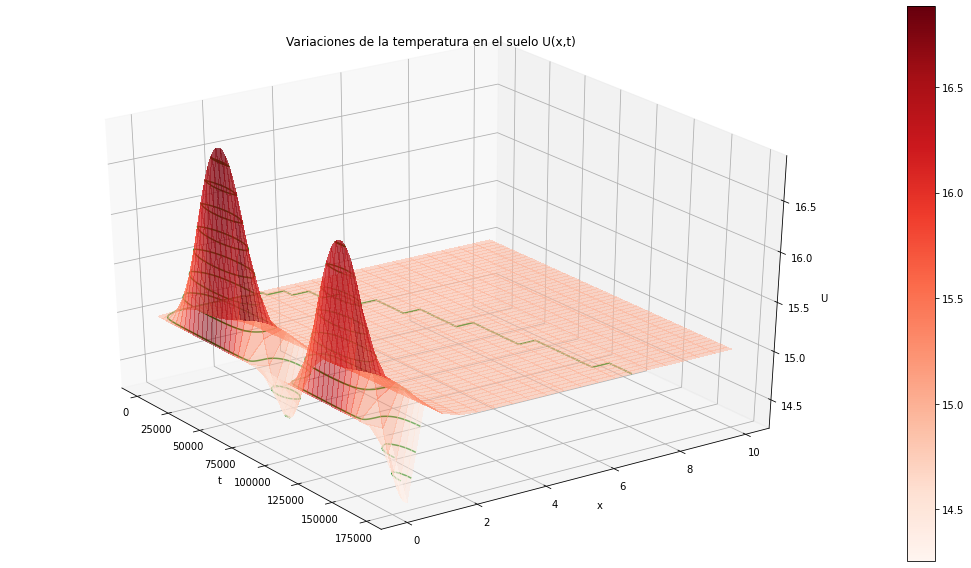

In [38]:
#Resolveremos este ejercicio 2 utilizando el método de diferencias finitas de segundo orden
#Lo primero sera definir los parámetros y condiciones iniciales del problema 

#Número de pasos
M=21   #Número de puntos en el eje x
N=15001   #Número de puntos en el tiempo
#Profundidad del suelo
x0=0.0  
xL=10.0 
#Intervalo de tiempo (Simulacion de 48hrs)
ti=0.0
tf=172800.0

dx = (xL-x0) / (M-1) # tamaño discretización en x
dt = (tf-ti) / (N-1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 1*10**(-6) # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(ti, tf, N)

# Tamaño de la matrix de la solución y con ceros
U = np.zeros((M, N))

# Condición inicial
U[:,0] = 15.0*np.ones(xspan.shape)

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    # Condiciones a la frontera (varía con el tiempo) 
    t=k*dt
    U[0, :] = 15 + 20*np.sin(2*np.pi*t/86400)
    U[-1, :] = 15
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Malla
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(15,8))

# Grafica
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',linewidth=0.01, antialiased=False, alpha=0.5)
# Contornos
ax.contour(T, X, U, 10,  colors="green", linestyles="solid")
ax.contour(T, X, U, 10,  cmap="coolwarm", linestyles="solid", offset=10)

# Tabla de valores 
m = plt.cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Variaciones de la temperatura en el suelo U(x,t)')

# Punto del observador 
ax.view_init(elev=30, azim=-35)

plt.tight_layout()
plt.show()